# Step 1: Data Processing 

In [1]:
pip install mlextend

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mlextend (from versions: none)
ERROR: No matching distribution found for mlextend


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats


In [3]:
heart_failure=pd.read_csv("C:/Users/Admin/Downloads/heart+failure+clinical+records/heart_failure_clinical_records_dataset.csv")

In [4]:
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
heart_failure.shape

(299, 13)

In [6]:
heart_failure.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
heart_failure.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [9]:
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
heart_failure.duplicated().sum()

0

In [11]:
heart_failure.kurtosis()

age                         -0.184871
anaemia                     -1.935563
creatinine_phosphokinase    25.149046
diabetes                    -1.901254
ejection_fraction            0.041409
high_blood_pressure         -1.618076
platelets                    6.209255
serum_creatinine            25.828239
serum_sodium                 4.119712
sex                         -1.618076
smoking                     -1.416080
time                        -1.212048
DEATH_EVENT                 -1.416080
dtype: float64

In [12]:
heart_failure.skew()

age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

In [13]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Outlier Identification

In [14]:
outliers=['creatinine_phosphokinase','platelets','serum_creatinine']
outlier_counts={}
outlier_data={}
for out in outliers:
    Q1=heart_failure[out].quantile(0.25)
    Q3=heart_failure[out].quantile(0.75)
    IQR=Q3-Q1
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    outlier_result=heart_failure[(heart_failure[out]<LB)|(heart_failure[out]>UB)]
    outlier_counts[out]=outlier_result.shape[0]
    outlier_data[out]=outlier_result
   # Print the outlier counts and the outliers
for out in outliers:
    print(f"Number of outliers in {out}: {outlier_counts[out]}")
    print(f"Outliers in {out}:")
    print(outlier_data[out])

Number of outliers in creatinine_phosphokinase: 29
Outliers in creatinine_phosphokinase:
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
38   60.0        0                      2656         1                 30   
46   51.0        0                      1380         0                 25   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
72   85.0        0                      5882         0                 35   
103  42.0        0                      5209         0                 30   
107  45.0        1                      1876         1                 35   
130  53.0        1                      1808         0                 60   
134  81.0        0                      4540         0                 35   
139  50.0        0                      1548         0          

# Step 2: EDA(Exploratory Data Analysis)

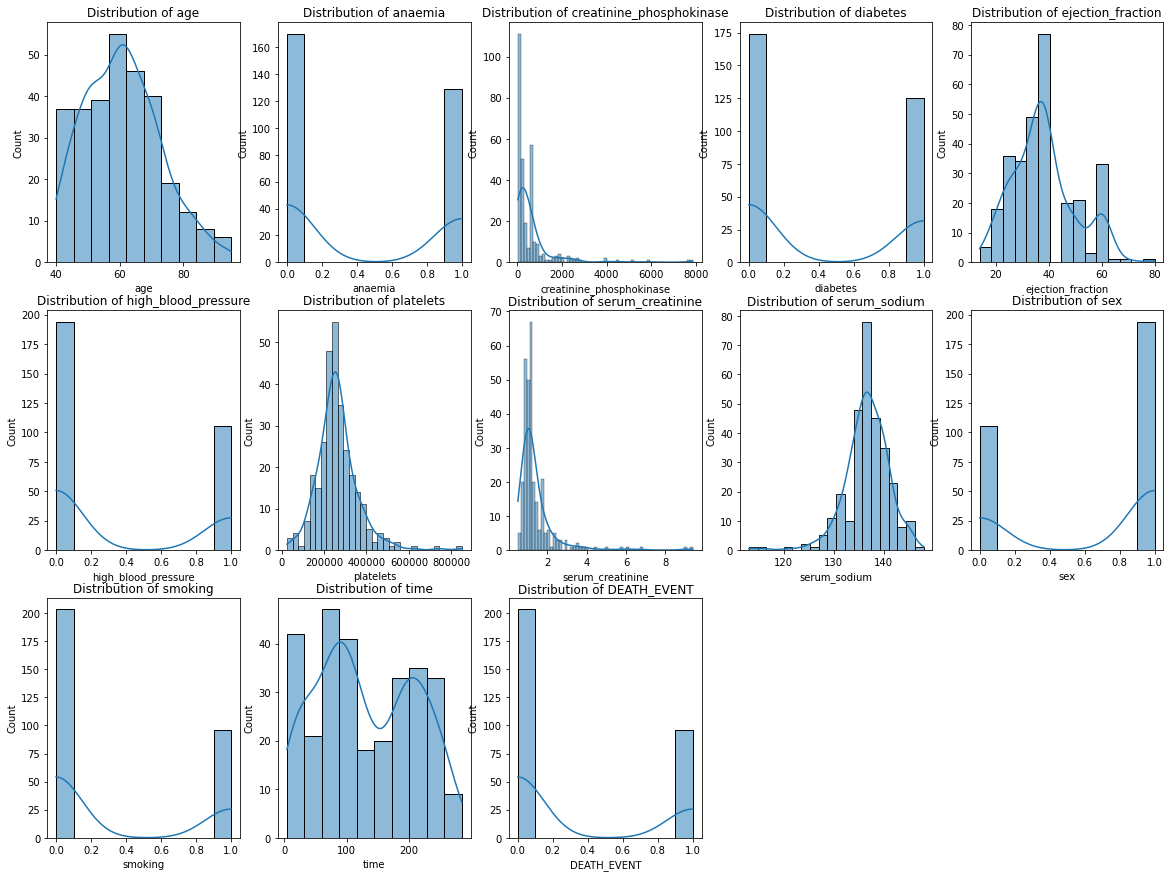

In [15]:
plt.figure(figsize=(20,15))
plot_number=1
for col in heart_failure.columns:
    if plot_number<=15:
        
        ax=plt.subplot(3,5,plot_number)
        sns.histplot(heart_failure[col],kde=True,ax=ax)
        plt.title(f'Distribution of {col}')
        plot_number +=1
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

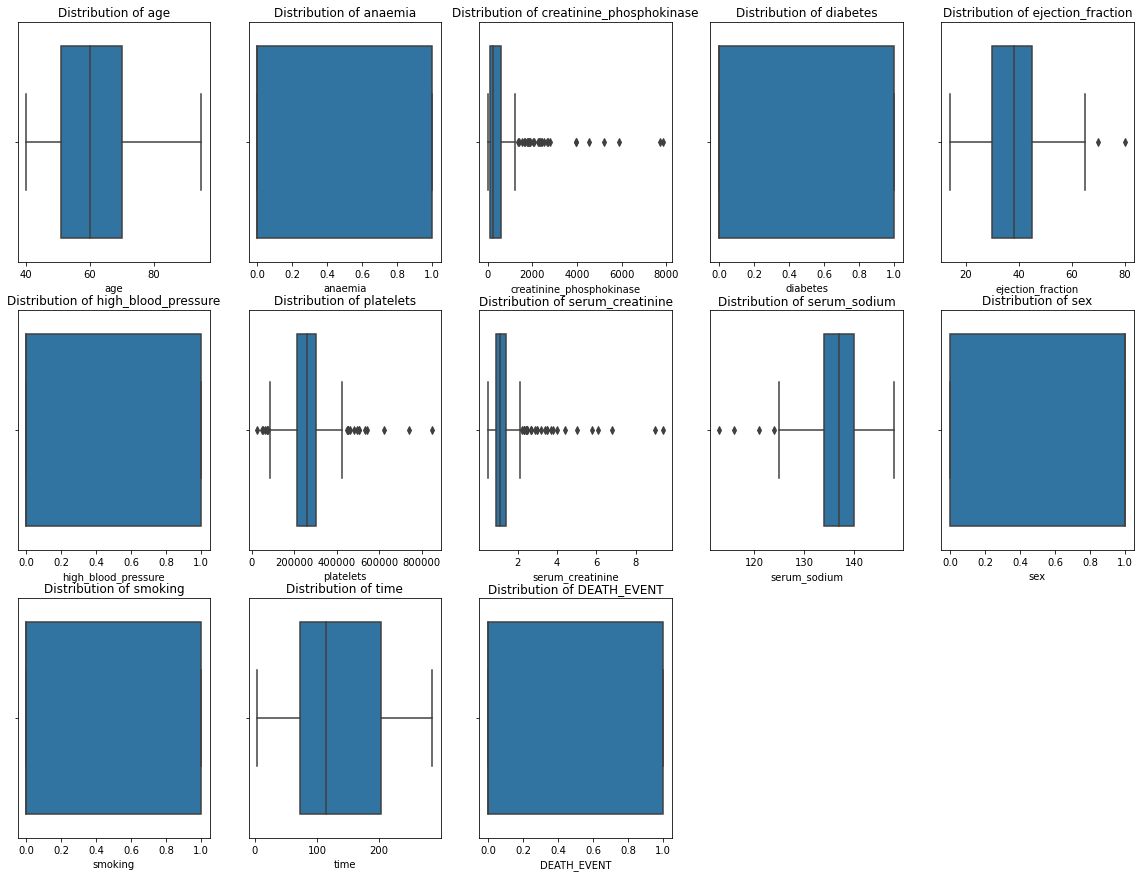

In [16]:
plt.figure(figsize=(20,15))
plot_number=1
for col in heart_failure.columns:
    if plot_number<=15:
        
        ax=plt.subplot(3,5,plot_number)
        sns.boxplot(heart_failure[col],ax=ax)
        plt.title(f'Distribution of {col}')
        plot_number +=1
plt.show()

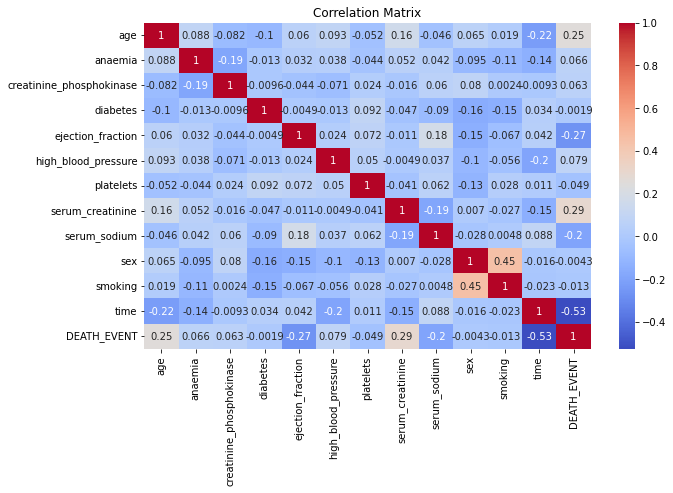

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(heart_failure.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [19]:
heart_failure['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

   # Step 3.Statistical Analysis

In [20]:
from scipy import stats
death_event_zero=heart_failure[heart_failure['DEATH_EVENT']==0]['serum_creatinine']
death_event_one=heart_failure[heart_failure['DEATH_EVENT']==1]['serum_creatinine']
t_statistics,p_value=stats.ttest_ind(death_event_zero,death_event_one)
print(f't statistics : {t_statistics}\n p value :{p_value}')

t statistics : -5.306457599754319
 p value :2.1901978548979685e-07


In [21]:
alpha=0.05
if p_value<alpha:
    print('Reject the Null Hypoyhesis : There is a significant difference in serum_creatinine level between patients who survived and thos who did not survived')
else:
     print('Fail to Reject the Null Hypoyhesis : There is no significant difference in serum_creatinine level between patients who survived and those who  not survived')


Reject the Null Hypoyhesis : There is a significant difference in serum_creatinine level between patients who survived and thos who did not survived


# Step 4:Feature Engineering

In [22]:
X=heart_failure.iloc[:,:-1]
Y=heart_failure['DEATH_EVENT']

#splitting data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Step 5: Model Evaluation

In [23]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        
        'max_iter':[100,1000]
    },
    'K Nearest Neighbor': {
        'n_neighbors': [3, 5, 7],
        
    },
    'Support Vector Machine': {
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],#no_boost_round because of this we This helps avoid overfitting .
        'learning_rate': [0.01, 0.1, 0.2],#eta
        #'num_class' : [2],
        'max_depth' :[2,3,5,7],
        #'objectives': ['binary:logistic']
    
    }
}

# Create models dictionary
models1 = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbor': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Iterate over models and perform Grid Search CV
best_models = {}
for model_name, model in models1.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)
    best_models[model_name] = grid_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_models[model_name].predict(X_test)
    
    # Evaluate and print results
    accuracy = accuracy_score(Y_test, y_pred)
    print(f'{model_name} Best Parameters: {grid_search.best_params_}')
    print(f'{model_name} Accuracy: {accuracy}','\n')
   # print(confusion_matrix(Y_test, y_pred))

Training Logistic Regression...
Logistic Regression Best Parameters: {'max_iter': 100}
Logistic Regression Accuracy: 0.7666666666666667 

Training K Nearest Neighbor...
K Nearest Neighbor Best Parameters: {'n_neighbors': 7}
K Nearest Neighbor Accuracy: 0.6833333333333333 

Training Support Vector Machine...
Support Vector Machine Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Support Vector Machine Accuracy: 0.8 

Training Decision Tree...
Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': None}
Decision Tree Accuracy: 0.65 

Training Random Forest...
Random Forest Best Parameters: {'n_estimators': 200}
Random Forest Accuracy: 0.7666666666666667 

Training XGBoost...
XGBoost Best Parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200}
XGBoost Accuracy: 0.7 



# Step 6 : Model Triaining 


# a.Full-Feature Model:

In [24]:
models={'logistic Regression': LogisticRegression(max_iter=100),
       'k nearest neighbour': KNeighborsClassifier(n_neighbors=7),
       'Support Vector Machine': SVC(kernel='linear',C=1,gamma=0.1,random_state=42),
       'Decisoin Tree ': DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=42),
       'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
       'XGBoost':XGBClassifier(eta=0.2,max_depth=2,n_estimators=200,random_state=42)
       }

#train and evaluate each model
for model_name,model in models.items():
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    print(f'{model_name} Accuracy : {accuracy}')
    print(confusion_matrix(Y_test,y_pred))
  


logistic Regression Accuracy : 0.7666666666666667
[[34  1]
 [13 12]]
k nearest neighbour Accuracy : 0.6833333333333333
[[35  0]
 [19  6]]
Support Vector Machine Accuracy : 0.8
[[34  1]
 [11 14]]
Decisoin Tree  Accuracy : 0.6166666666666667
[[26  9]
 [14 11]]
Random Forest Accuracy : 0.7166666666666667
[[31  4]
 [13 12]]
XGBoost Accuracy : 0.7
[[28  7]
 [11 14]]


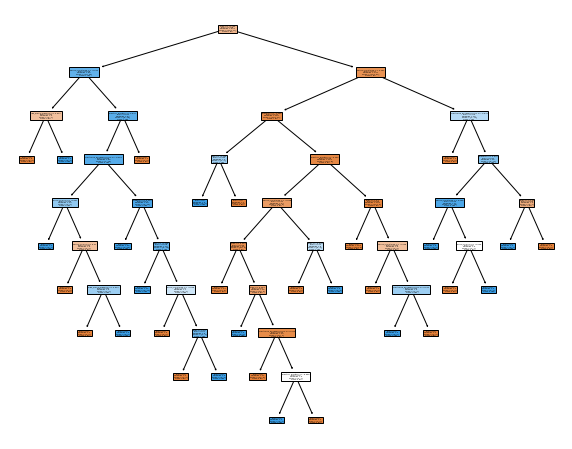

In [25]:
plt.figure(figsize=(10,8))
dcn_tree=DecisionTreeClassifier(criterion='gini',max_depth=None)
dcn_tree.fit(X_train,Y_train)
plot_tree(dcn_tree,filled=True,feature_names=heart_failure.columns,class_names=['No','Yes'])
plt.show()

In [26]:
X.shape

(299, 12)

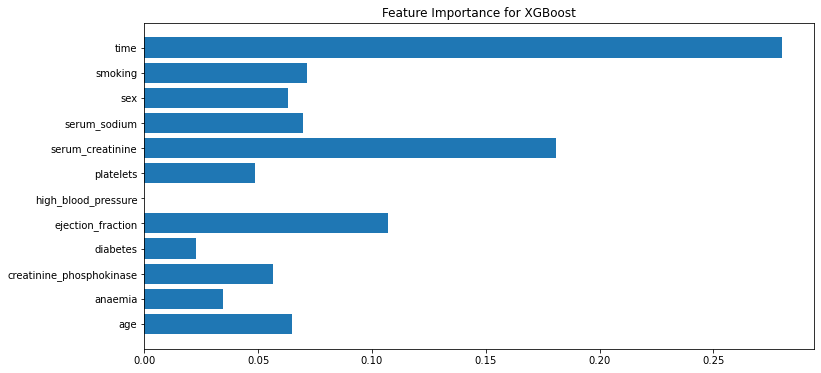

In [27]:
# Feature importance for XGBoost
xgb_model = models['XGBoost']
importance = xgb_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, importance)
plt.title('Feature Importance for XGBoost')
plt.show()


**High Accuracy:** An accuracy of 80% is quite robust for many applications, indicating that the model has learned to generalize well from the training data to unseen test data.

- **Precision and Recall:** The model achieved high precision for both classes, particularly for class 1 (death event), indicating that the predictions are reliable with a low rate of false positives. However, the recall for class 1 is 56%, indicating that the model misses a significant number of actual death events.
- **F1-Score:** The F1-score for class 0 is 0.85, demonstrating a well-balanced performance for non-death events. The F1-score for class 1 is 0.70, suggesting there is room for improvement in capturing true positive death events.
- **Confusion Matrix Analysis**
- **True Positives (TP):** 14 instances where the death event was correctly predicted.
- **True Negatives (TN):** 34 instances where non-death was correctly predicted.
- **False Positives (FP):** 1 instance where a non-death event was incorrectly predicted as a death event.
- **False Negatives (FN):** 11 instances where a death event was incorrectly predicted as a non-death event.


# b.Reduced-Feature Models:

In [28]:
heart_failure.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [29]:
x=heart_failure[['ejection_fraction','serum_creatinine']]
y=heart_failure['DEATH_EVENT']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Model Evaluation:

In [30]:

param_grids = {
    'Logistic Regression': {
        'max_iter':[100,1000],
        
    },
    'K Nearest Neighbor': {
        'n_neighbors': [3, 5, 7],
        
    },
    'Support Vector Machine': {
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth':[2,3,5,7],
        #'num_class':[2,3],
        #'objective':['binary:logistic']
    }
}
multiple_models={'Logistic Regression':LogisticRegression(),
        'K Nearest Neighbor':KNeighborsClassifier(),
        'Support Vector Machine':SVC(),
        'Decision Tree':DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier()
                }

best_model={}
for model_name,model in multiple_models.items():
    
    grid_Search=GridSearchCV(model,param_grids[model_name],cv=5,scoring='accuracy')
    grid_Search.fit(x_train,y_train)
    best_model[model_name]=grid_Search.best_estimator_
    
    y_pred=best_model[model_name].predict(x_test)
    accuracy_reduced_model=accuracy_score(y_test,y_pred)
    print(f'{model_name} best parameter  :{grid_Search.best_params_}' )
    print(f'{model_name} Accuracy  : {accuracy_reduced_model}','\n' )
    

Logistic Regression best parameter  :{'max_iter': 100}
Logistic Regression Accuracy  : 0.6333333333333333 

K Nearest Neighbor best parameter  :{'n_neighbors': 5}
K Nearest Neighbor Accuracy  : 0.6833333333333333 

Support Vector Machine best parameter  :{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
Support Vector Machine Accuracy  : 0.6 

Decision Tree best parameter  :{'criterion': 'gini', 'max_depth': None}
Decision Tree Accuracy  : 0.6666666666666666 

Random Forest best parameter  :{'n_estimators': 50}
Random Forest Accuracy  : 0.7 

XGBoost best parameter  :{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
XGBoost Accuracy  : 0.65 



# Model training:

In [31]:
multiple_model={'Logistic Regression':LogisticRegression(max_iter=100),
        'K nearest neighbour':KNeighborsClassifier(n_neighbors=5),
        'Support Vector Machine':SVC(kernel='rbf',C=1,gamma=0.2),
        'Decision Tree':DecisionTreeClassifier(criterion='gini',max_depth=None),
        'Random Forest': RandomForestClassifier(n_estimators=200),
        'XGBoost': XGBClassifier(max_depth=3,n_estimators=200,learning_rate=0.01,random_state=42)
    
}

for model_name,model in multiple_model.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    #cm=confusion_matrix(y_test,y_pred)
    print(f'Accuracy {model_name} : {accuracy}','\n')
    #print(f'confusoin_matrix {model_name} : {confusion_matrix}')
    

Accuracy Logistic Regression : 0.6333333333333333 

Accuracy K nearest neighbour : 0.6833333333333333 

Accuracy Support Vector Machine : 0.6 

Accuracy Decision Tree : 0.6666666666666666 

Accuracy Random Forest : 0.7 

Accuracy XGBoost : 0.65 



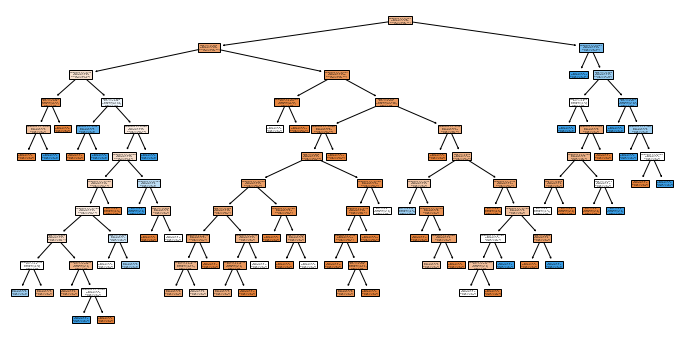

In [35]:
decn_tree=DecisionTreeClassifier(criterion='gini',max_depth=None)
decn_tree.fit(x_train,y_train)
plt.figure(figsize=(12,6))
plot_tree(decn_tree,filled=True,feature_names=heart_failure.columns,class_names=['No','Yes'])
plt.show()

# Summary

- 1.Full Feature Model: The SVM model provides a strong starting point for predicting death events, with an accuracy of 80%. However, improvements can be made in recall for the death event class. By following the recommendations, the model's performance can be further enhanced to provide more reliable predictions in a real-world setting.

- 2.Reduce Feature Model :Given the accuracies of various models using the features ejection_fraction and serum_creatinine to predict DEATH_EVENT, The Random Forest model has the highest accuracy (0.70) and typically provides robust performance due to its ensemble nature.
-  it is safe to conclude that the Random Forest model is the best predictor for your problem.
